In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics , preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [27]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [29]:
x = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = np.asanyarray(df['output'])
print(x)
print(y)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [30]:
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2,random_state=4)

In [41]:
htree = DecisionTreeClassifier(max_depth=4,criterion= 'entropy')
htree.fit(train_x , train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
yhat = htree.predict(test_x)
f1_score= metrics.f1_score(test_y , yhat)
acc_score = metrics.accuracy_score(test_y , yhat)
print(f'accuracy score:{acc_score}')
print(f'f1 score:{f1_score}')

accuracy score:0.8524590163934426
f1 score:0.88


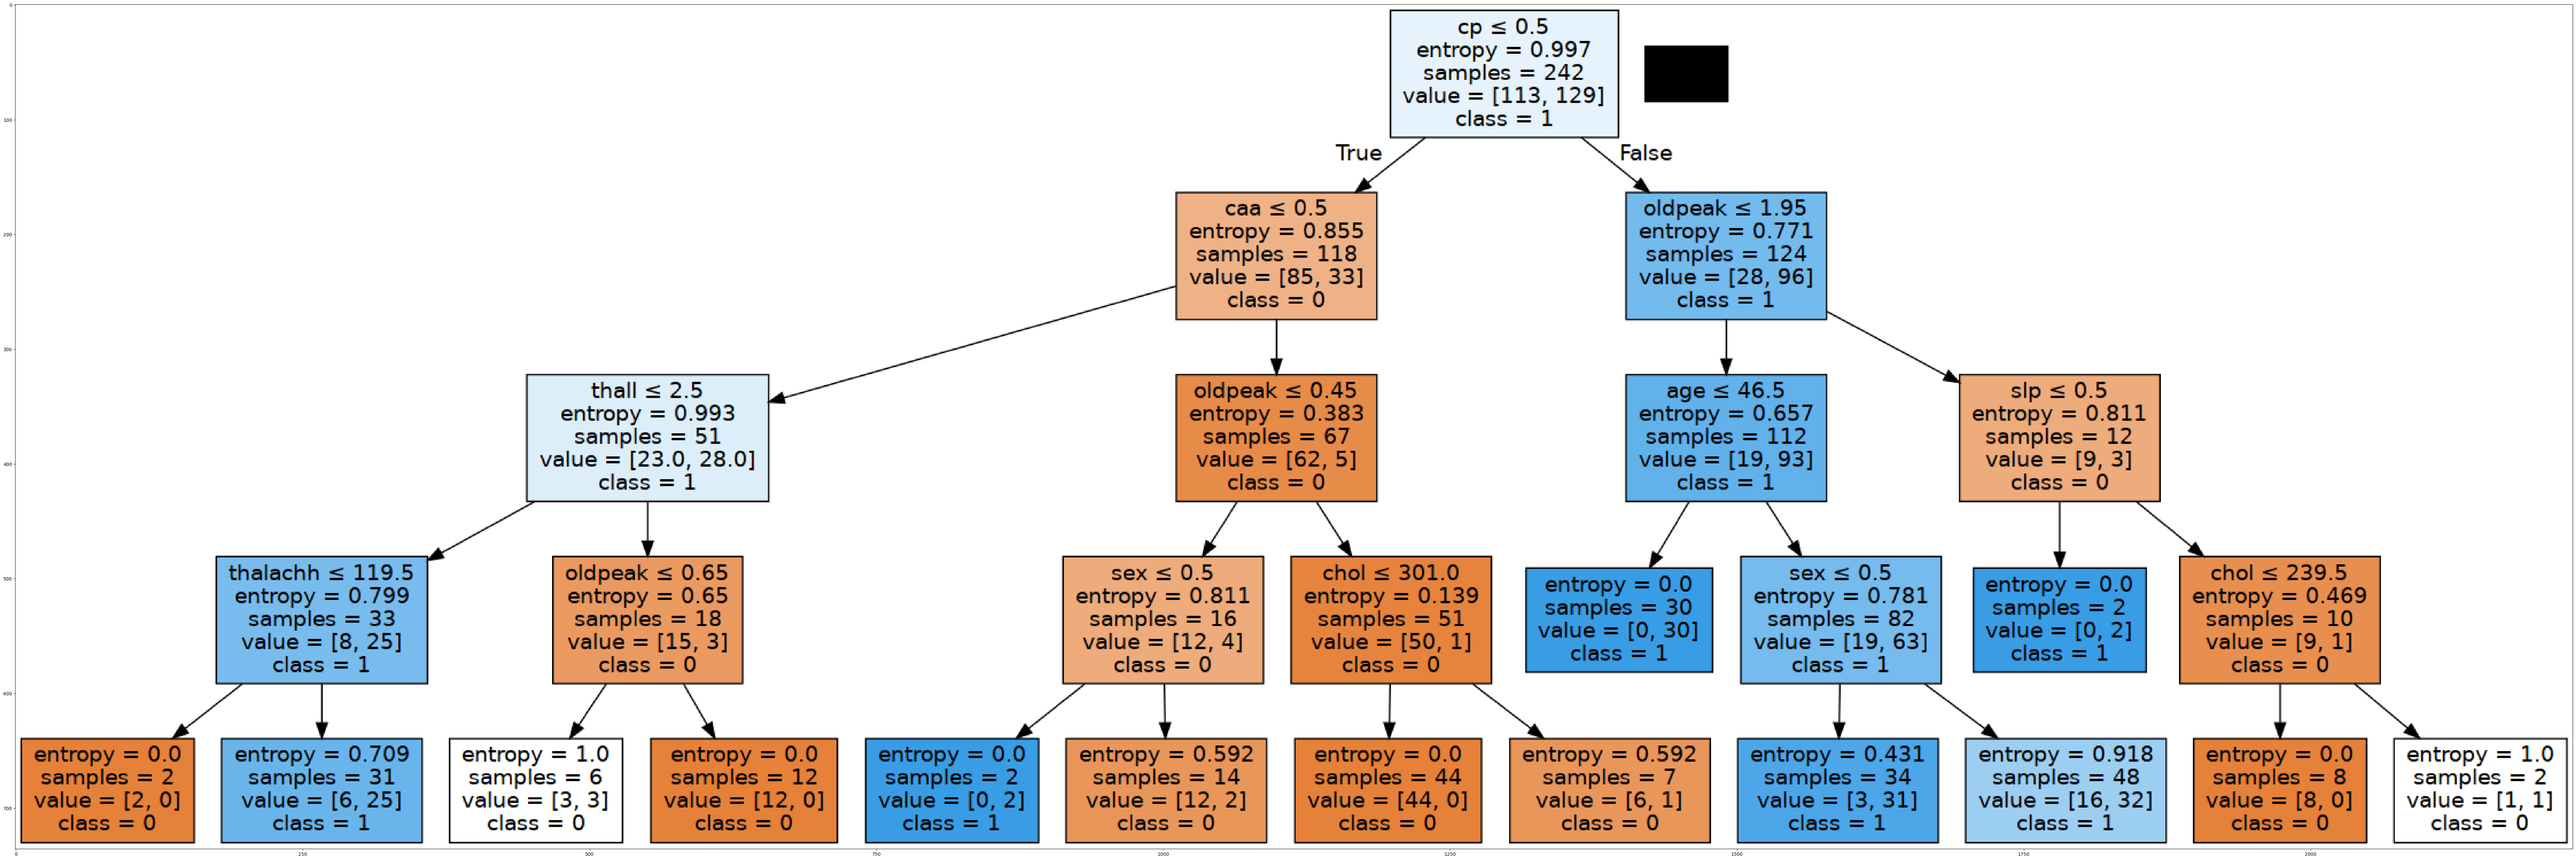

In [43]:
dot_data = StringIO()
filename = "htree.png"
featureNames = df.columns[0:13]


class_names = [str(x) for x in np.unique(train_y)]

out=tree.export_graphviz(htree,feature_names=featureNames, out_file=dot_data, class_names=class_names, filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
#thank you for see my little project :)